<h2 align="center"><strong>Image Classification with CIFAR10 dataset<strong></h2>

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4><strong>Loading the Data</strong></h4>

In [27]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [28]:
X_test.shape

(10000, 32, 32, 3)

<i>We have 50000 training images and 10000 test images</i>

In [29]:
y_train.shape

(50000, 1)

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

<i>y_train is a 2D array, for but our purpose we require 1D array to feed the neurons. So we will convert y_train into a 1D array</i>

In [31]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [32]:
y_test = y_test.reshape(-1,)

In [33]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

<h4><strong>Data Visualization</strong></h4>

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

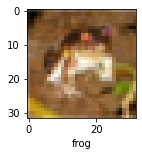

In [35]:
plot_sample(X_train, y_train, 0)

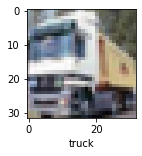

In [36]:
plot_sample(X_train, y_train, 1)

<h4><strong>Data Preprocessing</strong></h4>

<i>Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0 to 1 range, we need to divide it by 255. Normalization increases the accuracy of the model</i>

In [37]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4><strong>Building a Artificial Neural Network for Image Classification</strong></h4>

In [38]:
def get_model():
    ann = models.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(10, activation='softmax')    
        ])

    ann.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return ann

<h4><strong>GPU/CPU Benchmarking - Measuring the training time</strong></h4>

In [39]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
tf.test.is_built_with_cuda()

True

<i>Training on CPU - Ryzen 7 5800h</i>

In [56]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.8119 - accuracy: 0.3544
Epoch 2/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6224 - accuracy: 0.4270
Epoch 3/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5413 - accuracy: 0.4571
Epoch 4/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4822 - accuracy: 0.4773
Epoch 5/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4325 - accuracy: 0.4936
Epoch 6/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3901 - accuracy: 0.5106
Epoch 7/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3506 - accuracy: 0.5226
Epoch 8/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3174 - accuracy: 0.5352
Epoch 9/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2823 - accuracy: 0.5503
Epoch 10/20
1563/1563 [==============================] - 52s 33m

<i>Training on GPU - Nvidia RTX 3060</i>

In [58]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8122 - accuracy: 0.3544
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6227 - accuracy: 0.4262
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5395 - accuracy: 0.4599
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4797 - accuracy: 0.4799
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4293 - accuracy: 0.4965
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3865 - accuracy: 0.5118
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3490 - accuracy: 0.5256
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3133 - accuracy: 0.5382
Epoch 9/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2834 - accuracy: 0.5507
Epoch 10/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.251

Here is the performance comparison for 20 epoch of training time on CPU and GPU.

| Epoch | CPU | GPU  |
|:------|:------|:------|
| 20 | 17 min 19 sec | 1 min 33 sec |

We can see that GPU training is almost 12 times faster than CPU training. 

<i>With ANN, we get an accuracy of 66% at the end of 20 epochs.</i>

<h4><strong>Building a Convolutional Neural Network for Image classification</strong></h4>

In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [45]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4993 - accuracy: 0.4601
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1338 - accuracy: 0.6037
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0032 - accuracy: 0.6501
Epoch 4/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9219 - accuracy: 0.6786
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8549 - accuracy: 0.7021
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8072 - accuracy: 0.7199
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7603 - accuracy: 0.7347
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7207 - accuracy: 0.7480
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6811 - accuracy: 0.7617
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.644

<i>With CNN, at the end 20 epochs, accuracy is around 86% which is a significant improvement over ANN. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.</i>

<h4><strong>Testing the model</strong></h4>

In [47]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 1ms/step


array([[1.21693779e-06, 4.85283749e-07, 4.27841906e-06, 9.92019355e-01,
        1.88759668e-06, 7.96923693e-03, 1.83967074e-06, 2.05306727e-09,
        1.70913734e-06, 1.18037304e-08],
       [2.02334854e-06, 6.41295162e-04, 3.19163272e-12, 4.08760074e-11,
        2.46622731e-12, 7.32646971e-16, 1.83477417e-11, 1.78132736e-16,
        9.99356568e-01, 8.00394062e-08],
       [2.47977581e-02, 2.17410587e-02, 5.32428894e-05, 1.43205994e-04,
        6.81427309e-07, 2.06498248e-06, 1.04157669e-04, 9.47944936e-05,
        9.52650428e-01, 4.12586116e-04],
       [3.58724952e-01, 7.35355788e-05, 7.99329877e-02, 6.27459667e-04,
        2.23529714e-05, 1.96573183e-05, 5.46323099e-05, 4.31742956e-05,
        5.60498953e-01, 2.35238235e-06],
       [1.31737863e-07, 2.19197275e-07, 1.12563386e-04, 1.29507789e-02,
        4.33894038e-01, 3.34864366e-04, 5.52707314e-01, 1.25946878e-10,
        7.50749294e-08, 1.00567894e-10]], dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

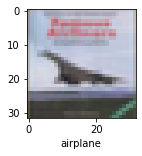

In [50]:
plot_sample(X_test, y_test,3)

In [51]:
classes[y_classes[3]]

'ship'